In [307]:
#Import everything 

import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import csv

import matplotlib.pyplot as plt
plt.style.use('seaborn')


#starting sentiment analysis 

import nltk
from nltk.corpus import stopwords

#Lemmatization
#Basically changing word like resturants to resturant(words to word) bc really they mean the same thing 

import textblob

from textblob import Word

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

#Sentiment Analysis

from textblob import TextBlob

In [308]:
df = pd.read_csv('/Users/markdetiberiis/MovieMonths/sent&profit.csv')

In [309]:
df

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity
0,0,tt0249516,Foodfight,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000.0,0.0,73706.0,Dec,31,2012,"['Odd adventure-comedy has lots of innuendo, c...","Odd adventure-comedy has lots of innuendo, car...",0.011111,0.416667
1,1,tt0398286,Tangled,100.0,"Adventure,Animation,Comedy",7.8,366366,15,260000000.0,200821936.0,586477240.0,Nov,24,2010,['This snappy role reversal may or may not app...,This snappy role reversal may or may not appea...,0.279006,0.481250
2,2,tt0448115,Shazam,132.0,"Action,Adventure,Comedy",7.4,109051,97,85000000.0,139606856.0,362899733.0,Apr,5,2019,"[""It's an interesting departure for Swedish ho...",It's an interesting departure for Swedish horr...,0.051822,0.535101
3,3,tt0466893,Margaret,150.0,Drama,6.5,14708,27,14000000.0,47185.0,623292.0,Sep,30,2011,['Margaret is less about plot mechanics than a...,Margaret is less about plot mechanics than abo...,0.111290,0.517119
4,4,tt0477080,Unstoppable,98.0,"Action,Thriller",6.8,173019,19,95000000.0,81562942.0,165720921.0,Nov,12,2010,['Snipes sempre uma presena interessante em c...,Snipes sempre uma presena interessante em cen...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,tt8259618,Serendipity,107.0,Drama,8.8,53,53,28000000.0,50255310.0,77477297.0,Oct,5,2001,"['""Serendipity"" will serve as an excellent gau...","""Serendipity"" will serve as an excellent gauge...",0.245336,0.610054
866,866,tt8653840,Flawless,97.0,Drama,6.4,34,14,27000000.0,4485485.0,4485485.0,Nov,24,1999,"['Outdated and schematic, this two-character m...","Outdated and schematic, this two-character mel...",0.235317,0.425198
867,867,tt8824064,Heroes,88.0,Documentary,7.3,7,12,400000.0,655538.0,655538.0,Oct,24,2008,"['The subject deserved a better film.', ""Samir...","The subject deserved a better film., Samir Kar...",0.077778,0.311111
868,868,tt8976772,Push,92.0,Documentary,7.3,33,70,38000000.0,31811527.0,49678401.0,Feb,6,2009,[],NaN,0.000000,0.000000


In [310]:
df.sort_values(by = ['worldwide_gross','genres'], ascending = False)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity
395,395,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009,"[""Rewatching it with fresh eyes 10 years later...","Rewatching it with fresh eyes 10 years later, ...",0.125000,0.386728
630,630,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997,['For all the sluggish script and the enormous...,For all the sluggish script and the enormous w...,0.121789,0.535103
127,127,tt1611845,Frozen,92.0,"Fantasy,Romance",5.4,75,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
126,126,tt1323045,Frozen,93.0,"Adventure,Drama,Sport",6.2,62311,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
128,128,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,567,tt2271563,Forsaken,90.0,"Action,Drama,Western",6.3,9199,54,18000000.0,0.0,0.000000e+00,Feb,19,2016,['The writer/director then squanders his waywa...,The writer/director then squanders his wayward...,-0.082909,0.526485
817,817,tt5519340,Bright,117.0,"Action,Crime,Fantasy",6.4,147834,80,90000000.0,0.0,0.000000e+00,Dec,13,2017,['... the movie delivers a unique if imperfect...,... the movie delivers a unique if imperfect t...,0.141213,0.572300
288,288,tt1653203,Jesse,120.0,"Action,Crime,Drama",4.9,96,32,950000.0,0.0,0.000000e+00,Aug,12,2014,[],NaN,0.000000,0.000000
435,435,tt1848834,Crossroads,87.0,"Action,Crime,Drama",7.8,8,86,500000.0,0.0,0.000000e+00,Jun,23,2015,[],NaN,0.000000,0.000000


In [311]:
#need to group by genre and display total profits for each 

In [312]:
y = df.genres[0]
y

'Action,Animation,Comedy'

In [313]:
print(y)

Action,Animation,Comedy


In [314]:
df.dtypes


Unnamed: 0             int64
tconst                object
primary_title         object
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
id                     int64
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
release_month         object
release_day            int64
release_year           int64
review                object
review_as_string      object
polarity             float64
subjectivity         float64
dtype: object

In [315]:
#collect number of movies in each genre 

Action = df['genres'].str.contains('Action').sum()
Animation = df['genres'].str.contains('Animation').sum()
Comedy = df['genres'].str.contains('Comedy').sum()
Mystery = df['genres'].str.contains('Mystery').sum()
Adventure  = df['genres'].str.contains('Adventure').sum()
Drama  = df['genres'].str.contains('Drama').sum()
Romance = df['genres'].str.contains('Romance').sum()
Music  = df['genres'].str.contains('Music').sum()
Documentary = df['genres'].str.contains('Documentary').sum()
Biography = df['genres'].str.contains('Biography').sum()
Thriller = df['genres'].str.contains('Thriller').sum()
Fantasy = df['genres'].str.contains('Fantasy').sum()
Crime = df['genres'].str.contains('Crime').sum()
Horror = df['genres'].str.contains('Horror').sum()
History = df['genres'].str.contains('History').sum()
SciFi = df['genres'].str.contains('Sci-Fi').sum()
Family = df['genres'].str.contains('Family').sum()

In [316]:
#Show number of movies in each genre 

print('There are {} Action Movies'.format(Action))
print('There are {} Animation Movies'.format(Animation))
print('There are {} Comedy Movies'.format(Comedy))
print('There are {} Mystery Movies'.format(Mystery))
print('There are {} Adventure Movies'.format(Adventure))
print('There are {} Drama Movies'.format(Drama))
print('There are {} Romantic Movies'.format(Romance))
print('There are {} Music Movies'.format(Music))
print('There are {} Documentary Movies'.format(Documentary))
print('There are {} Biographical Movies'.format(Biography))
print('There are {} Thriller Movies'.format(Thriller))
print('There are {} Fantasy Movies'.format(Fantasy))
print('There are {} Crime Movies'.format(Crime))
print('There are {} Horror Movies'.format(Horror))
print('There are {} History Movies'.format(History))
print('There are {} Sci-Fi Movies'.format(SciFi))
print('There are {} Family Movies'.format(Family))

There are 165 Action Movies
There are 32 Animation Movies
There are 154 Comedy Movies
There are 78 Mystery Movies
There are 92 Adventure Movies
There are 498 Drama Movies
There are 77 Romantic Movies
There are 21 Music Movies
There are 72 Documentary Movies
There are 56 Biographical Movies
There are 166 Thriller Movies
There are 41 Fantasy Movies
There are 101 Crime Movies
There are 101 Horror Movies
There are 15 History Movies
There are 66 Sci-Fi Movies
There are 39 Family Movies


In [317]:
billion_earning_df = df[(df['worldwide_gross'] > 1000000000)]

In [318]:
billion_earning_df.head(100)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity
51,51,tt1074638,Skyfall,143.0,"Action,Adventure,Thriller",7.8,592221,52,200000000.0,304360277.0,1.110527e+09,Nov,8,2012,"[""A Bond film should feature a menacing villai...",A Bond film should feature a menacing villain ...,0.136691,0.484188
126,126,tt1323045,Frozen,93.0,"Adventure,Drama,Sport",6.2,62311,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
127,127,tt1611845,Frozen,92.0,"Fantasy,Romance",5.4,75,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
128,128,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
200,200,tt1477834,Aquaman,143.0,"Action,Adventure,Fantasy",7.1,263328,36,160000000.0,335061807.0,1.146895e+09,Dec,21,2018,['The dumb parts of the movie are the best par...,The dumb parts of the movie are the best parts...,0.157400,0.478507
395,395,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009,"[""Rewatching it with fresh eyes 10 years later...","Rewatching it with fresh eyes 10 years later, ...",0.125000,0.386728
577,577,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000.0,336045770.0,1.160336e+09,Jul,10,2015,['I got tired of this joke before the movie en...,I got tired of this joke before the movie ende...,0.270517,0.634412
630,630,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997,['For all the sluggish script and the enormous...,For all the sluggish script and the enormous w...,0.121789,0.535103
679,679,tt2948356,Zootopia,108.0,"Adventure,Animation,Comedy",8.0,383446,57,150000000.0,341268248.0,1.019430e+09,Mar,4,2016,"[""There are enough under-the-radar subtleties,...","There are enough under-the-radar subtleties, r...",0.262825,0.555487


In [319]:
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt1323045']
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt1611845']
billion_earning_df = billion_earning_df[billion_earning_df.tconst != 'tt2316801']

In [320]:
billion_earning_df.sort_values(by = 'worldwide_gross', ascending = False)

,Unnamed: 0,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity
395,395,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009,"[""Rewatching it with fresh eyes 10 years later...","Rewatching it with fresh eyes 10 years later, ...",0.125000,0.386728
630,630,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997,['For all the sluggish script and the enormous...,For all the sluggish script and the enormous w...,0.121789,0.535103
128,128,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222
577,577,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000.0,336045770.0,1.160336e+09,Jul,10,2015,['I got tired of this joke before the movie en...,I got tired of this joke before the movie ende...,0.270517,0.634412
200,200,tt1477834,Aquaman,143.0,"Action,Adventure,Fantasy",7.1,263328,36,160000000.0,335061807.0,1.146895e+09,Dec,21,2018,['The dumb parts of the movie are the best par...,The dumb parts of the movie are the best parts...,0.157400,0.478507
51,51,tt1074638,Skyfall,143.0,"Action,Adventure,Thriller",7.8,592221,52,200000000.0,304360277.0,1.110527e+09,Nov,8,2012,"[""A Bond film should feature a menacing villai...",A Bond film should feature a menacing villain ...,0.136691,0.484188
679,679,tt2948356,Zootopia,108.0,"Adventure,Animation,Comedy",8.0,383446,57,150000000.0,341268248.0,1.019430e+09,Mar,4,2016,"[""There are enough under-the-radar subtleties,...","There are enough under-the-radar subtleties, r...",0.262825,0.555487


In [321]:
#Average day of the month that each billion dollar earning movie came out on 

print('The average day of the month billion dollar movies come out on is {}'.format(billion_earning_df['release_day'].mean()))
      
      

The average day of the month billion dollar movies come out on is 14.571428571428571


In [322]:
#collect number of movies in each genre 

ActionB = billion_earning_df['genres'].str.contains('Action').sum()
AnimationB = billion_earning_df['genres'].str.contains('Animation').sum()
ComedyB = billion_earning_df['genres'].str.contains('Comedy').sum()
MysteryB = billion_earning_df['genres'].str.contains('Mystery').sum()
AdventureB  = billion_earning_df['genres'].str.contains('Adventure').sum()
DramaB  = billion_earning_df['genres'].str.contains('Drama').sum()
RomanceB = billion_earning_df['genres'].str.contains('Romance').sum()
MusicB  = billion_earning_df['genres'].str.contains('Music').sum()
DocumentaryB = billion_earning_df['genres'].str.contains('Documentary').sum()
BiographyB = billion_earning_df['genres'].str.contains('Biography').sum()
ThrillerB = billion_earning_df['genres'].str.contains('Thriller').sum()
FantasyB = billion_earning_df['genres'].str.contains('Fantasy').sum()
CrimeB = billion_earning_df['genres'].str.contains('Crime').sum()
HorrorB = billion_earning_df['genres'].str.contains('Horror').sum()
HistoryB = billion_earning_df['genres'].str.contains('History').sum()
SciFiB = billion_earning_df['genres'].str.contains('Sci-Fi').sum()
FamilyB = billion_earning_df['genres'].str.contains('Family').sum()

In [323]:
#Show how many Billion $$ movies are of each genre 

print('There are {} Billion Dollar grossing Action Movies'.format(ActionB))
print('There are {} Billion Dollar grossing Animation Movies'.format(AnimationB))
print('There are {} Billion Dollar grossing Comedy Movies'.format(ComedyB))
print('There are {} Billion Dollar grossing Mystery Movies'.format(MysteryB))
print('There are {} Billion Dollar grossing Adventure Movies'.format(AdventureB))
print('There are {} Billion Dollar grossing Drama Movies'.format(DramaB))
print('There are {} Billion Dollar grossing Romantic Movies'.format(RomanceB))
print('There are {} Billion Dollar grossing Music Movies'.format(MusicB))
print('There are {} Billion Dollar grossing Documentary Movies'.format(DocumentaryB))
print('There are {} Billion Dollar grossing Biographical Movies'.format(BiographyB))
print('There are {} Billion Dollar grossing Thriller Movies'.format(ThrillerB))
print('There are {} Billion Dollar grossing Fantasy Movies'.format(FantasyB))
print('There are {} Billion Dollar grossing Crime Movies'.format(CrimeB))
print('There are {} Billion Dollar grossing Horror Movies'.format(HorrorB))
print('There are {} Billion Dollar grossing History Movies'.format(HistoryB))
print('There are {} Billion Dollar grossing Sci-Fi Movies'.format(SciFiB))
print('There are {} Billion Dollar grossing Family Movies'.format(FamilyB))

There are 2 Billion Dollar grossing Action Movies
There are 3 Billion Dollar grossing Animation Movies
There are 3 Billion Dollar grossing Comedy Movies
There are 0 Billion Dollar grossing Mystery Movies
There are 6 Billion Dollar grossing Adventure Movies
There are 0 Billion Dollar grossing Drama Movies
There are 0 Billion Dollar grossing Romantic Movies
There are 0 Billion Dollar grossing Music Movies
There are 0 Billion Dollar grossing Documentary Movies
There are 0 Billion Dollar grossing Biographical Movies
There are 1 Billion Dollar grossing Thriller Movies
There are 1 Billion Dollar grossing Fantasy Movies
There are 0 Billion Dollar grossing Crime Movies
There are 1 Billion Dollar grossing Horror Movies
There are 0 Billion Dollar grossing History Movies
There are 0 Billion Dollar grossing Sci-Fi Movies
There are 0 Billion Dollar grossing Family Movies


In [324]:
#Action and Adventure movies make up huge percentage of billion dollar movies 


In [325]:
genresB = {'Action': [ActionB], "Animation": AnimationB, "Comedy": ComedyB,"Myster": MysteryB, "Adventure": AdventureB,"Drama": DramaB, "Romantic": RomanceB, "Music": MusicB, "Documentary": DocumentaryB, "Biography": BiographyB, "Thriller": ThrillerB, "Fantasy": FantasyB, "Crime": CrimeB, "Horror": HorrorB, "History": HistoryB, "Sci-Fi": SciFiB, "Family": FamilyB}

genre_df = pd.DataFrame(genresB)

In [326]:
genre_df

,Action,Animation,Comedy,Myster,Adventure,Drama,Romantic,Music,Documentary,Biography,Thriller,Fantasy,Crime,Horror,History,Sci-Fi,Family
0,2,3,3,0,6,0,0,0,0,0,1,1,0,1,0,0,0


In [327]:
genre_df = genre_df.T

genre_df.to_csv('/Users/markdetiberiis/MovieMonths/billion_by_genre.csv')

In [335]:
g_df = pd.read_csv('/Users/markdetiberiis/MovieMonths/billion_by_genre.csv')

In [329]:
#get rid of that un names column
                          
g_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [332]:
g_df = g_df.T

In [341]:
genre_df

,0
Action,2
Animation,3
Comedy,3
Myster,0
Adventure,6
Drama,0
Romantic,0
Music,0
Documentary,0
Biography,0


In [342]:
y = genre_df[0]

x = y.index



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

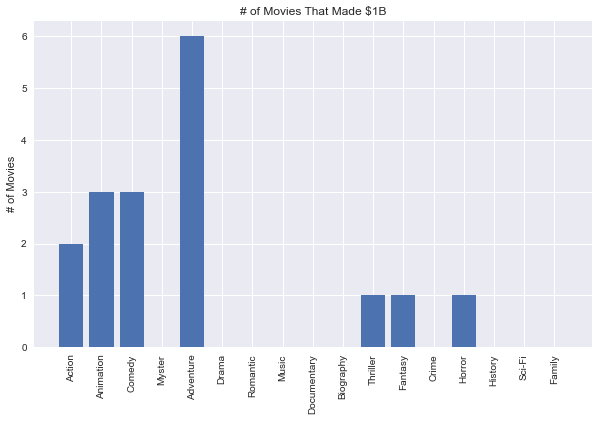

In [343]:
fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

ax.set_title('# of Movies That Made $1B')
#ax.set_xlabel('Genre')
ax.set_ylabel('# of Movies')
plt.xticks(rotation=90)




In [344]:
billion_earning_df.to_csv('/Users/markdetiberiis/MovieMonths/billion_movies.csv')

In [345]:
bill_df = pd.read_csv('/Users/markdetiberiis/MovieMonths/billion_movies.csv')

In [346]:
bill_df.drop(['genres_as_string'], axis = 1, inplace = True)


KeyError: "['genres_as_string'] not found in axis"

In [347]:
bill_df['genres_as_string'] = bill_df['genres'].apply(', '.join)
bill_df['genres_as_string']=bill_df['genres_as_string'].str.replace(',','')
bill_df['genres_as_string']=bill_df['genres_as_string'].str.replace(' ','')

bill_df

,Unnamed: 0,Unnamed: 0.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity,genres_as_string
0,51,51,tt1074638,Skyfall,143.0,"Action,Adventure,Thriller",7.8,592221,52,200000000.0,304360277.0,1.110527e+09,Nov,8,2012,"[""A Bond film should feature a menacing villai...",A Bond film should feature a menacing villain ...,0.136691,0.484188,ActionAdventureThriller
1,128,128,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222,AdventureAnimationComedy
2,200,200,tt1477834,Aquaman,143.0,"Action,Adventure,Fantasy",7.1,263328,36,160000000.0,335061807.0,1.146895e+09,Dec,21,2018,['The dumb parts of the movie are the best par...,The dumb parts of the movie are the best parts...,0.157400,0.478507,ActionAdventureFantasy
3,395,395,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009,"[""Rewatching it with fresh eyes 10 years later...","Rewatching it with fresh eyes 10 years later, ...",0.125000,0.386728,Horror
4,577,577,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000.0,336045770.0,1.160336e+09,Jul,10,2015,['I got tired of this joke before the movie en...,I got tired of this joke before the movie ende...,0.270517,0.634412,AdventureAnimationComedy
5,630,630,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997,['For all the sluggish script and the enormous...,For all the sluggish script and the enormous w...,0.121789,0.535103,Adventure
6,679,679,tt2948356,Zootopia,108.0,"Adventure,Animation,Comedy",8.0,383446,57,150000000.0,341268248.0,1.019430e+09,Mar,4,2016,"[""There are enough under-the-radar subtleties,...","There are enough under-the-radar subtleties, r...",0.262825,0.555487,AdventureAnimationComedy


In [348]:
bill_df

,Unnamed: 0,Unnamed: 0.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year,review,review_as_string,polarity,subjectivity,genres_as_string
0,51,51,tt1074638,Skyfall,143.0,"Action,Adventure,Thriller",7.8,592221,52,200000000.0,304360277.0,1.110527e+09,Nov,8,2012,"[""A Bond film should feature a menacing villai...",A Bond film should feature a menacing villain ...,0.136691,0.484188,ActionAdventureThriller
1,128,128,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,56,150000000.0,400738009.0,1.272470e+09,Nov,22,2013,"['Quote not available.', 'An early and provoca...","Quote not available., An early and provocative...",0.500000,0.522222,AdventureAnimationComedy
2,200,200,tt1477834,Aquaman,143.0,"Action,Adventure,Fantasy",7.1,263328,36,160000000.0,335061807.0,1.146895e+09,Dec,21,2018,['The dumb parts of the movie are the best par...,The dumb parts of the movie are the best parts...,0.157400,0.478507,ActionAdventureFantasy
3,395,395,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009,"[""Rewatching it with fresh eyes 10 years later...","Rewatching it with fresh eyes 10 years later, ...",0.125000,0.386728,Horror
4,577,577,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,73,74000000.0,336045770.0,1.160336e+09,Jul,10,2015,['I got tired of this joke before the movie en...,I got tired of this joke before the movie ende...,0.270517,0.634412,AdventureAnimationComedy
5,630,630,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997,['For all the sluggish script and the enormous...,For all the sluggish script and the enormous w...,0.121789,0.535103,Adventure
6,679,679,tt2948356,Zootopia,108.0,"Adventure,Animation,Comedy",8.0,383446,57,150000000.0,341268248.0,1.019430e+09,Mar,4,2016,"[""There are enough under-the-radar subtleties,...","There are enough under-the-radar subtleties, r...",0.262825,0.555487,AdventureAnimationComedy


In [288]:
bill_df["Biography"] = np.where(bill_df.genres.str.contains("Biography"), True, False)


In [259]:
#create a new colum for every genre and a bool value if that movie is part of that genre

bill_df['Action'] = np.where(bill_df.genres.str.contains("Action"), True, False)
bill_df["Comedy"] = np.where(bill_df.genres.str.contains("Comedy"), True, False)
bill_df["Mystery"] = np.where(bill_df.genres.str.contains("Mystery"), True, False)
bill_df["Adventure"] = np.where(bill_df.genres.str.contains("Adventure"), True, False)
bill_df["Drama"] = np.where(bill_df.genres.str.contains("Drama"), True, False)
bill_df["Romance"] = np.where(bill_df.genres.str.contains("Romance"), True, False)
bill_df["Music"] = np.where(bill_df.genres.str.contains("Music"), True, False)
bill_df["Documentary"] = np.where(bill_df.genres.str.contains("Documentary"), True, False)
bill_df["Thriller"] = np.where(bill_df.genres.str.contains("Thriller"), True, False)
bill_df["Fantasy"] = np.where(bill_df.genres.str.contains("Fantasy"), True, False)
bill_df["Crime"] = np.where(bill_df.genres.str.contains("Crime"), True, False)
bill_df["Horror"] = np.where(bill_df.genres.str.contains("Horror"), True, False)
bill_df["History"] = np.where(bill_df.genres.str.contains("History"), True, False)
bill_df["Sci-Fi"] = np.where(bill_df.genres.str.contains("Sci-Fi"), True, False)
bill_df["Family"] = np.where(bill_df.genres.str.contains("Family"), True, False)


In [289]:
Action_pol = bill_df['polarity'].loc[bill_df['Action'] == True].mean()
Comedy_pol =bill_df['polarity'].loc[bill_df['Comedy'] == True].mean()
Mystery_pol = bill_df['polarity'].loc[bill_df['Mystery'] == True].mean()
Adventure_pol  =bill_df['polarity'].loc[bill_df['Adventure'] == True].mean()
Drama_pol  = bill_df['polarity'].loc[bill_df['Drama'] == True].mean()
Romance_pol = bill_df['polarity'].loc[bill_df['Romance'] == True].mean()
Music_pol  = bill_df['polarity'].loc[bill_df['Music'] == True].mean()
Documentary_pol = bill_df['polarity'].loc[bill_df['Documentary'] == True].mean()
Biography_pol = bill_df['polarity'].loc[bill_df['Biography'] == True].mean()
Thriller_pol = bill_df['polarity'].loc[bill_df['Thriller'] == True].mean()
Fantasy_pol = bill_df['polarity'].loc[bill_df['Fantasy'] == True].mean()
Crime_pol = bill_df['polarity'].loc[bill_df['Crime'] == True].mean()
Horror_pol = bill_df['polarity'].loc[bill_df['Horror'] == True].mean()
History_pol = bill_df['polarity'].loc[bill_df['History'] == True].mean()
SciFi_pol = bill_df['polarity'].loc[bill_df['Sci-Fi'] == True].mean()
Family_pol =bill_df['polarity'].loc[bill_df['Family'] == True].mean()

In [292]:
genreChart = {'Action': [Action_pol], "Comedy": Comedy_pol, "Mysteyr": Mystery_pol,"Adventure": Adventure_pol, "Drama": Drama_pol,"Romance": Romance_pol, "Music": Music_pol, "Documentary": Documentary_pol, "Biography": Biography_pol, "Thriller": Thriller_pol, "Fantasy": Fantasy_pol, "Crime": Crime_pol, "Horror": Horror_pol, "History": History_pol, "Sci-Fi": SciFi_pol, "Family": Family_pol}


In [293]:
Genre_sent_df = pd.DataFrame.from_dict(genreChart)

In [295]:
#Clean the columns we dont need

Genre_sent_df.drop(['Mysteyr','Drama','Romance','Music','Documentary','Biography','Crime','History','Sci-Fi','Family'], axis = 1, inplace = True)


In [297]:
Genre_sent_df = Genre_sent_df.T

In [298]:
Genre_sent_df

,0
Action,0.147046
Comedy,0.344447
Adventure,0.241537
Thriller,0.136691
Fantasy,0.157400
Horror,0.125000


In [299]:
y = Genre_sent_df[0]
x = y.index

Text(0, 0.5, 'The closer to 1 the better')

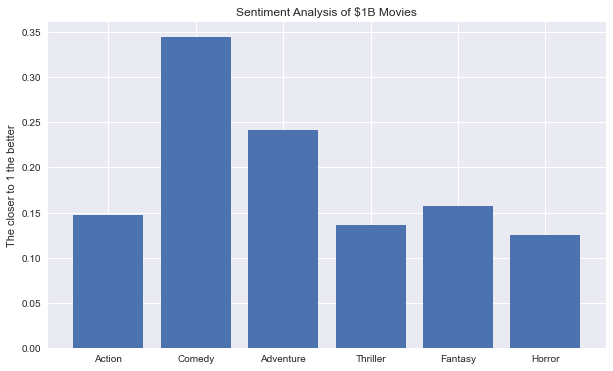

In [306]:
fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x,y)

ax.set_title('Sentiment Analysis of $1B Movies')
#ax.set_xlabel('Genre')
ax.set_ylabel('The closer to 1 the better')
#plt.xticks(rotation=90)
